In [55]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [56]:
try:
    df_household_convert = pd.read_csv(
        "data/household_power_consumption.txt",
        sep=";",
        dtype=str
    )

    df_household_convert.to_parquet('data/household_power_consumption.parquet', engine='fastparquet', index=False)
except FileNotFoundError:
    print("Arquivo de ref não existe")
except Exception as e:
    print(e)

Arquivo de ref não existe


### 1. Carregue o dataset e exiba as 10 primeiras linhas.

In [57]:
df_household = pd.read_parquet(
    "data/household_power_consumption.parquet",
    engine='fastparquet',
)

df_household.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.000
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.000
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.000
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.000
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.000


---

### 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

- Global_active_power:
  A energia real que está sendo consumida pela residência para realizar trabalho útil.

- Global_reactive_power:
  A energia que circula no sistema elétrico, mas não é convertida em trabalho útil.


---

### 3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [58]:
for col in [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3",
]:
    df_household[col] = pd.to_numeric(df_household[col], errors='coerce')

In [59]:
df_household.info()
df_household.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [60]:
df_null_data = pd.DataFrame(
    {
        "nao_nulos": df_household.notna().sum(),
        "nulos": df_household.isna().sum(),
        "percentual (%)": df_household.isna().mean() * 100,
    }
)
df_null_data

,nao_nulos,nulos,percentual (%)
Date,2075259,0,0.000000
Time,2075259,0,0.000000
Global_active_power,2049280,25979,1.251844
Global_reactive_power,2049280,25979,1.251844
Voltage,2049280,25979,1.251844
Global_intensity,2049280,25979,1.251844
Sub_metering_1,2049280,25979,1.251844
Sub_metering_2,2049280,25979,1.251844
Sub_metering_3,2049280,25979,1.251844


---

### 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente


In [61]:
def dia_da_semana(dia: pd.Timestamp):
    dia_semana = datetime.date.weekday(dia)
    if dia_semana == 0:
        return "Segunda"
    elif dia_semana == 1:
        return "Terça"
    elif dia_semana == 2:
        return "Quarta"
    elif dia_semana == 3:
        return "Quinta"
    elif dia_semana == 4:
        return "Sexta"
    elif dia_semana == 5:
        return "Sabado"
    elif dia_semana == 6:
        return "Domingo"
    else:
        return "erro"

In [62]:
df_household['Date'] = pd.to_datetime(df_household['Date'], dayfirst=True)
df_household['week_day'] = df_household['Date'].apply(lambda x: dia_da_semana(x))

In [63]:
df_household.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week_day
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Sabado
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Sabado
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Sabado
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Sabado
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Sabado


---

### 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.


In [64]:
df_household['year'] = df_household['Date'].apply(lambda x: x.year)

In [65]:
df_household.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week_day,year
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Sabado,2006
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Sabado,2006
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Sabado,2006
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Sabado,2006
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Sabado,2006


In [66]:
df_household_group_by_year = (
    df_household.groupby(["year"])
    .agg({"Global_active_power": "mean"})
    .reset_index()
)
df_household_group_by_year[df_household_group_by_year['year'] == 2007]
# df_household_group_by_year.info()

,year,Global_active_power
1,2007,1.117008


---

### 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.


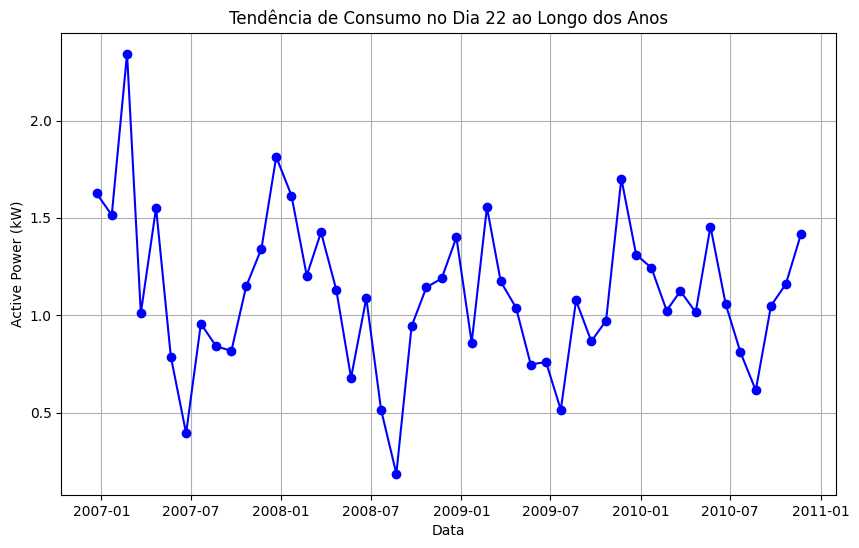

In [67]:
df_household_group_by_date = (
    df_household.groupby(["year", "Date"])
    .agg({"Global_active_power": "mean", "Voltage": "mean"})
    .reset_index()
)

df_household_group_by_date["day"] = df_household_group_by_date["Date"].apply(
    lambda x: x.day
)

# day_consumption = df_household_group_by_date[["year", "day", "Global_active_power"]]
day_consumption = df_household_group_by_date.copy()
day_consumption = day_consumption[day_consumption["day"] == 22]

# Plotar a tendência de consumo ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(
    day_consumption["Date"],
    day_consumption["Global_active_power"],
    marker="o",
    linestyle="-",
    color="b",
)
plt.xlabel("Data")
plt.ylabel("Active Power (kW)")
plt.title("Tendência de Consumo no Dia 22 ao Longo dos Anos")
plt.grid(True)
plt.show()


---

### 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

In [68]:
mean_consuption = df_household_group_by_date[["Date", "Voltage"]]

fig = px.bar(
    mean_consuption,
    x="Date",
    y="Voltage",
    title="Voltagem / ano",
    text="Voltage",
)
fig.update_layout(
    width=800,
    height=800,
)

fig.show()

> Voltagem é algo estável ao longo do tempo

--- 

### 8. Calcule o consumo médio por mês em todo o período disponível no dataset.


In [69]:
month_consuption = df_household_group_by_date.copy()
month_consuption['month'] = month_consuption['Date'].apply(lambda x: x.month)
month_consuption_grouped = month_consuption.groupby("month")['Global_active_power'].mean().round(5).reset_index()

fig = px.bar(
    month_consuption_grouped,
    x="month",
    y="Global_active_power",
    title="Comsumo / mês",
    text="Global_active_power",
)
fig.update_layout(
    width=800,
    height=800,
)

fig.show()

--- 

### 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [70]:
max_consuption_day = df_household.copy()

max_value = max(max_consuption_day['Global_active_power'])

max_consuption_day = max_consuption_day[max_consuption_day['Global_active_power'] == max_value]

max_consuption_day

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week_day,year
1150545,2009-02-22,17:09:00,11.122,0.174,229.78,48.4,35.0,69.0,16.0,Domingo,2009


--- 

### 10. Compare o consumo médio de energia ativa global em dias de semana versus finais desemana.

In [71]:
week_day_consuption = df_household.groupby('week_day')['Global_active_power'].mean().round(3).reset_index()

fig = px.bar(
    week_day_consuption,
    x="week_day",
    y="Global_active_power",
    title="Comsumo / dia da semana",
    text="Global_active_power",
)
fig.update_layout(
    width=800,
    height=800,
)

fig.show()

> O consumo é maior aos finais de semana

--- 

11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

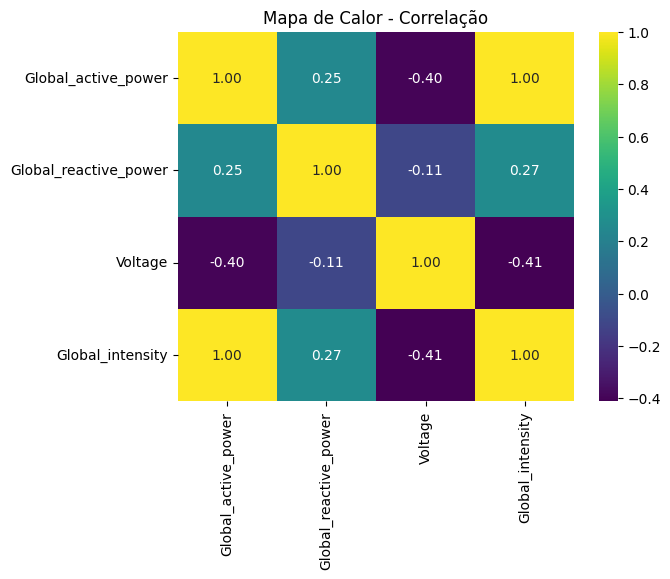

In [72]:

df_correlation = df_household[
    ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]
].copy()

# Calcula a matriz de correlação
corr = df_correlation.corr()

# Cria o mapa de calor
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")

plt.title("Mapa de Calor - Correlação")
plt.show()

> Sem correlação

---

### 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,Sub_metering_2 e Sub_metering_3

In [73]:
'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'

def soma_sub_metering(row):
    soma = row['Sub_metering_1'] + row['Sub_metering_2'] + row['Sub_metering_3']
    return soma

df_household['Total_Sub_metering'] = df_household.apply(lambda x: soma_sub_metering(x), axis=1)
df_household.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week_day,year,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Sabado,2006,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Sabado,2006,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Sabado,2006,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Sabado,2006,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Sabado,2006,18.0


--- 

### 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [74]:
df_household['simple_date'] = df_household['Date'].apply(lambda x: x.strftime("%Y-%b"))
df_household_group_by_simple_date = df_household.groupby(['simple_date']).agg({'Total_Sub_metering': 'mean'}).reset_index()
global_consuption_mean = df_household['Global_active_power'].mean()
df_household_group_by_simple_date.head()

,simple_date,Total_Sub_metering
0,2006-Dec,10.873181
1,2007-Apr,6.839375
2,2007-Aug,6.979336
3,2007-Dec,11.636551
4,2007-Feb,9.486135


In [75]:
df_household_group_by_simple_date['dif_power_metering'] = df_household_group_by_simple_date['Total_Sub_metering'].apply(lambda x: global_consuption_mean - x)
df_household_group_by_simple_date.head()

,simple_date,Total_Sub_metering,dif_power_metering
0,2006-Dec,10.873181,-9.781566
1,2007-Apr,6.839375,-5.747760
2,2007-Aug,6.979336,-5.887721
3,2007-Dec,11.636551,-10.544936
4,2007-Feb,9.486135,-8.394520


In [76]:
fig = px.bar(
    df_household_group_by_simple_date,
    x="simple_date",
    y="dif_power_metering",
    title="Comsumo / dia da semana",
    text="dif_power_metering",
)
fig.update_layout(
    width=800,
    height=800,
)

fig.show()

> nenhum mês possui um Total_Sub_metering maior que a média de Global_active_power

--- 

### 14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

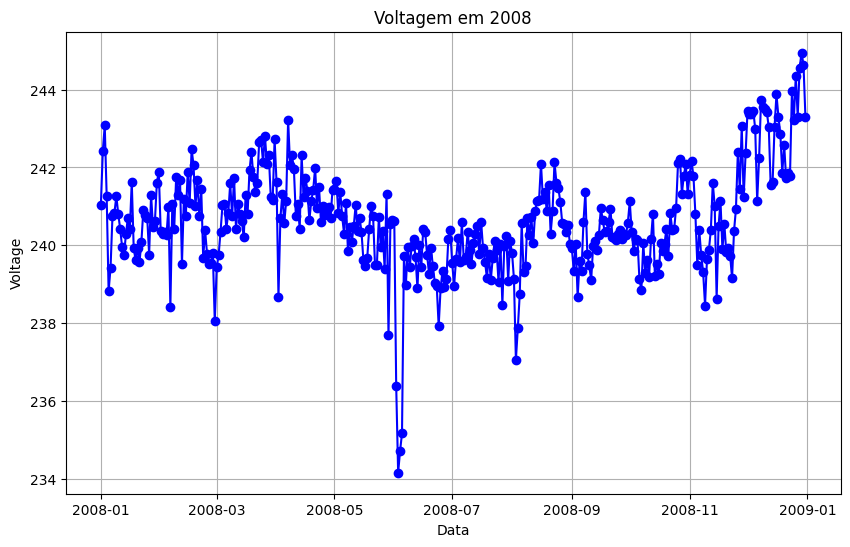

In [77]:
df_voltage_year = df_household[
    [
        "Date",
        "Voltage",
        "year",
    ]
].copy()

df_voltage_year = df_voltage_year[df_voltage_year['year'] == 2008]

df_voltage_year_grouped = df_voltage_year.groupby(['Date','year'])['Voltage'].mean().round(2).reset_index()

# Plotar a tendência de consumo ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(
    df_voltage_year_grouped["Date"],
    df_voltage_year_grouped["Voltage"],
    marker="o",
    linestyle="-",
    color="b",
)
plt.xlabel("Data")
plt.ylabel("Voltage")
plt.title("Voltagem em 2008")
plt.grid(True)
plt.show()

--- 

### 15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte)

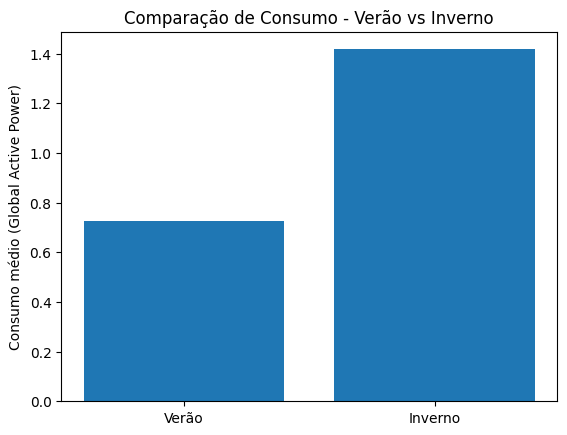

In [78]:
df_household["Month"] = df_household["Date"].dt.month
verao = df_household[df_household["Month"].isin([6, 7, 8])]
inverno = df_household[df_household["Month"].isin([12, 1, 2])]

consumo_verao = verao["Global_active_power"].mean()
consumo_inverno = inverno["Global_active_power"].mean()

plt.bar(["Verão", "Inverno"], [consumo_verao, consumo_inverno])
plt.ylabel("Consumo médio (Global Active Power)")
plt.title("Comparação de Consumo - Verão vs Inverno")
plt.show()

> O consumo no inverno é quase o dobro que no verão

--- 

### 16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição deGlobal_active_power é semelhante à da base completa.

In [79]:
df_sample = df_household[['simple_date','Global_active_power']].sample(frac=0.01, random_state=42)

print(df_household[['simple_date','Global_active_power']].describe())
print(df_sample.describe())

       Global_active_power
count         2.049280e+06
mean          1.091615e+00
std           1.057294e+00
min           7.600000e-02
25%           3.080000e-01
50%           6.020000e-01
75%           1.528000e+00
max           1.112200e+01
       Global_active_power
count         20486.000000
mean              1.097499
std               1.049284
min               0.078000
25%               0.308000
50%               0.608000
75%               1.542000
max               7.878000


> esta semelhante, só não pegou na amostragem o maior valor da base completa

--- 

### 17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

#### 🔹 Como funciona (fórmula)

Essa técnica transforma os valores para um intervalo fixo (geralmente [0,1]).

$$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

🔹 O que acontece:

Todos os valores vão ficar entre 0 e 1.

Você mantém o mesmo número de linhas e colunas, só muda a escala.

É ideal antes de algoritmos que dependem de distância (KNN, SVM, redes neurais, etc).

In [80]:
# Selecionando apenas as variáveis numéricas
df_numeric = df_household[[
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity"
]]

# Criando o scaler
scaler = MinMaxScaler()

# Aplicando transformação
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_numeric),
    columns=df_numeric.columns
)

df_scaled.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,0.374796,0.300719,0.376090,0.377593
1,0.478363,0.313669,0.336995,0.473029
2,0.479631,0.358273,0.326010,0.473029
3,0.480898,0.361151,0.340549,0.473029
4,0.325005,0.379856,0.403231,0.323651


--- 

### 18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

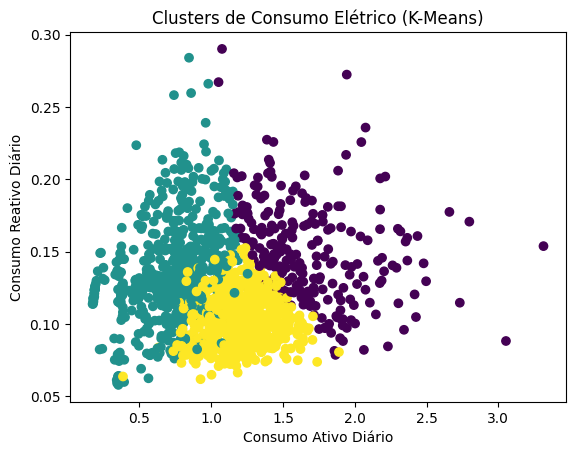

In [81]:
# **Garantir a coluna de data**:

# Agregação por dia** (aqui você pode escolher: soma, média, etc. Geralmente soma de energia faz sentido):

df_daily = (
    df_household.groupby("Date")
    .agg(
        {
            "Global_active_power": "mean",
            "Global_reactive_power": "mean",
            "Voltage": "mean",
            "Global_intensity": "mean",
        }
    )
    .reset_index()
)
df_daily = df_daily.dropna()

df_scaled = scaler.fit_transform(df_daily.drop(columns=["Date"]))

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_daily["Cluster"] = kmeans.fit_predict(df_scaled)

plt.scatter(
    df_daily["Global_active_power"],
    df_daily["Global_reactive_power"],
    c=df_daily["Cluster"],
    cmap="viridis",
)
plt.xlabel("Consumo Ativo Diário")
plt.ylabel("Consumo Reativo Diário")
plt.title("Clusters de Consumo Elétrico (K-Means)")
plt.show()

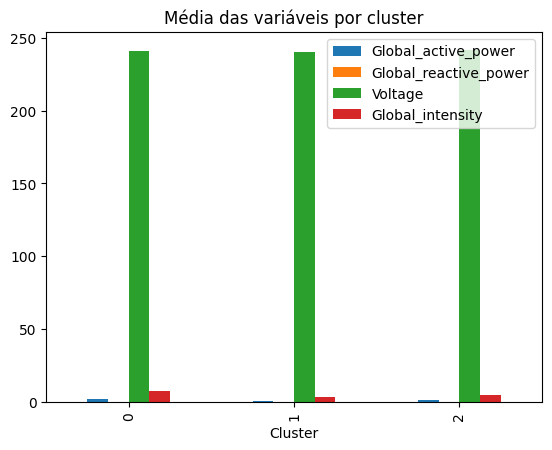

In [82]:
df_cluster_mean = df_daily.groupby("Cluster")[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]].mean()
df_cluster_mean.plot(kind="bar")
plt.title("Média das variáveis por cluster")
plt.show()


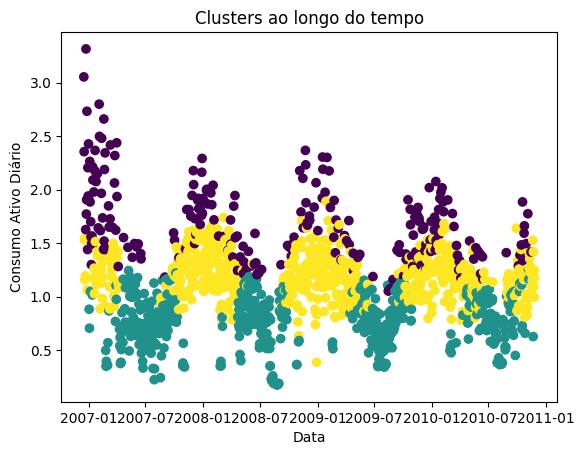

In [83]:
plt.scatter(df_daily["Date"], df_daily["Global_active_power"], c=df_daily["Cluster"], cmap="viridis")
plt.xlabel("Data")
plt.ylabel("Consumo Ativo Diário")
plt.title("Clusters ao longo do tempo")
plt.show()

🔹 O que acontece no fundo

Você pediu 3 clusters → ele calculou 3 centroides (pontos médios no espaço multidimensional).

Cada dia foi associado ao cluster mais próximo.

O gráfico colorido é só uma forma de mostrar: “esses dias têm perfil parecido → ficam juntos”.

Então, a diferença de verdade entre quantis e clusters é:

Quantis = corte fixo por ordem (percentuais iguais).

K-Means = corte por semelhança, que pode dar grupos de tamanhos diferentes.

🔹 Por que isso é útil

Você não fica só com uma ideia de baixo/médio/alto consumo (quantis já fariam isso).

Você tem grupos que capturam padrões de comportamento diferentes.

Exemplo: pode aparecer um cluster de dias com alta intensidade mas tensão baixa, diferente de dias de alto consumo com tensão estável.

--- 

### 19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) paraGlobal_active_power em um período de 6 meses.